## 95-865 Spring 2019 Quiz

Your name:

Your Andrew ID:

This quiz has two problems, a conceptual problem (Problem 1), and a coding problem (Problem 2).

## Problem 1: Conceptual questions [45 points]

Parts (a), (b), and (c) can be done in any order. For this problem, your answers should *not* involve any coding.

### Part (a): True or false, and explain [9 points]

For each of the statements below, please specify whether the statement is true or false, *and then briefly explain why*.

(i) When running k-means with 100 random initializations and a fixed choice of the number of clusters k, the best clustering is found using CH index.

**Your answer here**: False. For a fixed number of clusters k, the best clustering for k-means is found by minimizing RSS and not CH index.

(ii) If we run divisive clustering using k-means (with k=2) to do each split, and we stop after we have 3 clusters, the result is the same as if we fit k-means with 3 clusters.

**Your answer here**: False. To provide some intuition, imagine 3 evenly spaced perfect circles of points in a line where the circles of points are separated (i.e., they do not overlap). k-means with k=3 could nicely identify these 3 circles (if we run k-means with enough random initializations). However, divisive clustering would first split the 3 circles into 2 clusters, with basically no hope of correctly clustering the 3 circles. The second split done would have no way of correcting the first split as it will split up one of the two clusters identified in the first split.

(iii) Suppose two entities have a high PMI (much larger than 0) and they only co-occur once. This could be because one of the entities is extremely uncommon (i.e., has a low probability of appearing).

**Your answer here**: True. Recall that PMI is given by log(P(A,B)/(P(A)P(B))) for two entities A and B. So if one of the two entities is extremely rare (P(A) is extremely small or P(B) is extremely small), then the PMI can be large. In fact, this phenomenon was seen in your homework 1 problem 2 (the last part).

### Part (b): Bigrams [8 points]

Consider the following string: "21100322232"

Treating each character as a separate token, determine the histogram of raw counts of the bigrams in the string above (by hand and not using any code). Remove any bigram term that has the stop word character "1" anywhere in it. Your answer should be of the format:

```
bigram term 1: raw count for bigram term 1
bigram term 2: raw count for bigram term 2
...
```

Please present your bigram terms in *increasing* order (rather than decreasing order) of raw count (break ties arbitrarily).

**Your answer here (no code)**:

The bigrams prior to removing any stop words are:

```
21
11
10
00
03
32
22
22
23
32
```

Once we remove any bigram with "1" in it, we are left with:

```
00
03
32
22
22
23
32
```

Thus, the resulting histogram is (sorted in increasing order, breaking ties arbitrarily):

```
00: 1
03: 1
23: 1
32: 2
22: 2
```

### Part (c): Isomap [28 points]

Consider 5 points A, B, C, D, and E with the following table of Euclidean distances between them (these do *not* account for any sort of nearest neighbor graph structure):

| &nbsp; | A          | B          | C          | D          | E          |
| ------ | ---------- | ---------- | ---------- | ---------- | ---------- |
| A      | 0          | 1          | $\sqrt{2}$ | $\sqrt{5}$ | 2          |
| B      | 1          | 0          | 1          | 2          | $\sqrt{5}$ |
| C      | $\sqrt{2}$ | 1          | 0          | 1          | $\sqrt{2}$ |
| D      | $\sqrt{5}$ | 2          | 1          | 0          | 1          |
| E      | 2          | $\sqrt{5}$ | $\sqrt{2}$ | 1          | 0          |

(i) What is the single nearest neighbor of point A?

**Your answer here**: B

(ii) What are the two nearest neighbors of point B?

**Your answer here**: A and C

(iii) What are the two nearest neighbors of point C?

**Your answer here**: B and D

(iv) What are the two nearest neighbors of point D?

**Your answer here**: C and E

(v) What is the single nearest neighbor of point E?

**Your answer here**: D

Now suppose that we construct a nearest neighbor graph as follows:

- We connect point A to its single nearest neighbor.
- We connect points B, C, and D each to its two nearest neighbors.
- We connect point E to its single nearest neighbor.

(vi) What are the edges ("roads") that get constructed? Write your answer by listing out the edges that get constructed (you can specify an edge using the phrase "(A,E)" to mean an edge between point A and point E; note that edge (A,E) and (E,A) are the same so you do not need to write both of them).

**Your answer here**: (A,B), (B, C), (C, D), (D, E)

(vii) Now, using the edges you have listed down in the previous step, compute the shortest distances between every pair of points where one can only travel on the edges ("roads").

**Specify your answer by filling out the table below:**

| &nbsp; | A          | B          | C          | D          | E          |
| ------ | ---------- | ---------- | ---------- | ---------- | ---------- |
| A      | 0          | 1          | 2          | 3          | 4          |
| B      | 1          | 0          | 1          | 2          | 3          |
| C      | 2          | 1          | 0          | 1          | 2          |
| D      | 3          | 2          | 1          | 0          | 1          |
| E      | 4          | 3          | 2          | 1          | 0          |

(viii) What is a valid one-dimensional representation of the points A, B, C, D, and E that would have Euclidean distances (in 1D) exactly match the table you computed in subpart (v), and where the low-dimensional coordinate for A is A' = 0? As a reminder, there is no coding in this problem.

**Specify your answer by writing in values for points B', C', D', E' (low-dimensional versions of B, C, D, E):**

B' = 1

C' = 2

D' = 3

E' = 4

(ix) Is there more than 1 valid answer to subpart (vii) in which A' = 0? Why or why not?

**Your answer here**: Yes. B' = -1, C' = -2, D' = -3, E' = -4

## Problem 2: Analyzing Judge Opinions [55 points]

In this problem, we examine a dataset of majority opinions written by U.S. courts from 1970-2018. While the judges' votes determine the outcomes of each case, the written majority opinions (in this dataset) sets the scope and justification of the precedent that the immediate ruling establishes.

The code cell below reads in the data and stores it in two separate lists:

- The opinion text (stored in the Python variable `opinions`)
- The judgement year (stored in `years`)

The opinion texts have already been preprocessed and lemmatized.

**Important: Be sure to run the cell below before you run anything else.** *After running the cell below, you can do parts (a) and (b) in either order.*

In [1]:
# DO NOT MODIFY THIS CELL
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

years = []
opinions = []
with open('opinions.txt', 'r', encoding='UTF-8') as f:
    for line in f:
        opinions.append(line.strip())
with open('years.txt', 'r', encoding='UTF-8') as f:
    for line in f:
        years.append(int(line.strip()))
years = np.array(years)

print(len(opinions)) # should be 4388
print(len(years)) # should be 4388

4388
4388


## Part (a): Extracting Topics with LDA [30 points]

### Subpart 2(a)-i: Construct the TF-IDF matrix [10 points]

1. Remove the most common 100 words and store the final vocabulary in a list called `vocabulary` (you should find that there are 106723 words after removing the most common 100). After removing the most common 100 words, make sure to sort the words alphabetically.
2. Construct a (4388, 106723) matrix of TF-IDF scores for the opinions using this `vocabulary`. Store this matrix as `tfidf_mat`. (In particular, you should use `TfidfVectorizer` with a single parameter `vocabulary=vocabulary`.)

Note: for us, doing the above two steps takes less than 30 seconds to run. If you simply cannot get these to run correctly, you can load in the final values using the code at the beginning of Problem 2(b). We will grade subpart 2(a)-i based on whether you can correctly produce `vocabulary` and `tfidf_mat` *without* using our pre-computed values in Problem 2(b).

In [2]:
words = [word.lower() for opinion in opinions for word in opinion.split()] # these are all the words

# WARNING: do *not* use spaCy and do *not* remove any words except for the most common 100

# ------------------------------------------------------------------------------
# YOUR CODE HERE
#

from collections import Counter
histogram = Counter()
for word in words:
    histogram[word] += 1
sorted_pairs = sorted(histogram.items(), key=lambda x: x[1], reverse=True)
sorted_pairs = sorted_pairs[100:]  # remove most common 100 terms
vocabulary = sorted([term for term, count in sorted_pairs])

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(vocabulary=vocabulary)
tfidf_mat = vectorizer.fit_transform(opinions)

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

### Subpart 2(a)-ii: Extract 10 topics using LDA [5 points]

We have already fitted an LDA model to the data for you (because this is slow). Using the fitted LDA components learned, print out the top 10 words for each topic. To keep the printing concise, please have your output displayed in the following format:

```
Topic 0 : list of the top 10 words separated by commas, where the first word is the most probable for the topic
Topic 1 : ...
Topic 2 : ...
...
Topic 9 : ...
```

In [3]:
lda_components = np.loadtxt('lda_components.txt')  # pre-fitted LDA components

# ------------------------------------------------------------------------------
# YOUR CODE HERE
#
for topic_idx, word_dist in enumerate(lda_components):
    top_word_indices = np.argsort(-word_dist)[:10]
    top_words = [vocabulary[word_idx] for word_idx in top_word_indices]
    print('Topic', topic_idx, ':', ', '.join(top_words))
#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

Topic 0 : fmcsa, newsracks, plasma, hyphenate, racetrack, persecutor, cantaloupe, letterbox, sdn, eulogio
Topic 1 : piccadilly, pedal, ssdi, nevils, equilon, ttab, mirzayance, sto, stos, hastings
Topic 2 : cfc, copa, detainers, tcpa, overmyer, cognovit, cheever, winery, santana, pelly
Topic 3 : sorna, subclause, hoeper, nonregistrants, coupler, din, nelsons, pregranted, fryer, burro
Topic 4 : olympic, chick, fog, broiler, rumery, prescriber, mms, gme, detailers, repo
Topic 5 : first, counsel, fourth, employer, plan, agency, immunity, officer, plaintiff, suit
Topic 6 : escheat, haskell, ilecs, guerrilla, rrha, jackpot, scr, misjoinder, vartelas, thompkins
Topic 7 : delawares, 16c, sfts, exeat, postcrime, aetc, 47b, sag, trest, lust
Topic 8 : iras, boren, stumpf, asme, honorarium, tovar, ocp, creche, maples, deadhead
Topic 9 : methadone, lodger, shale, worthen, toca, allocatur, sulindac, neomycin, nonunitary, 1514a


### Subpart 2(a)-iii: Rank the top 10 words in each topic using "relevance" [15 points]

"*Relevance*" is as an alternate metric to rank words so as to penalize frequent words. This sometimes results in better descriptions of topics than ranking words by the word-topic probabilities as in 2(a)-ii. The relevance of a word $w$ for each topic $k$ is defined as:

$$
r(k, w) = \lambda \textrm{log}(P(w|k)) + (1 - \lambda)\textrm{log}(\frac{P(w|k)}{P(w)})
$$

Here, $P(w|k)$ is the probability of word $w$ given the topic $k$, and $P(w)$ is the overall probability of the word in the corpus.

**Print the top 10 words in each topic ranked by relevance for $\lambda =$ 0.0, 0.4, 0.8 and 1.0.**

Note:
   - You will be printing 4 word lists, each one similar to the one you printed in 2(a)-ii.
   - When $\lambda = 1$, the words are ranked by $P(w|k)$ as usual and your results should be identical to 2(a)-ii.
   - You must *reuse* the fitted LDA components (do not fit a new LDA model). We are only changing the way the top words of a topic are ranked.

*Hint to compute $P(w)$:*

To compute $P(w)$, make use of the raw counts you computed in subpart 2(a)-i. Divide by the total sum of raw counts across words that didn't get removed.

*Hints to compute $P(w|k)$:*

You already have a matrix containing the *unnormalized* $P(w|k)$; this needs to be normalized by making sure each row sums to one.

**Important:** It's okay if you find that the topics are not very interpretable. We will be grading based on whether you can do the calculations mentioned above correctly rather than whether the topics are interpretable. In part (b), we will be looking at an approach that results in more interpretable topics.

In [4]:
# ------------------------------------------------------------------------------
# YOUR CODE HERE (to compute P(w))
#

total_count = 0
for word in vocabulary:
    total_count += histogram[word]
P_w = np.array([histogram[word] / total_count for word in vocabulary])

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------


# ------------------------------------------------------------------------------
# YOUR CODE HERE (to compute P(w|k))
#

P_wk = np.array([row / row.sum() for row in lda_components])

#
# END OF YOUR CODE
# ------------------------------------------------------------------------------

for lam in [0, 0.4, 0.8, 1.0]:
    print('[lambda = ', lam, ']', sep='')
    
    # Print the top 10 words by reusing your code in 2(a)-ii
    # The only change required is to sort by relevance, instead of
    # unnormalized word probabilities in each topic
    
    # --------------------------------------------------------------------------
    # YOUR CODE HERE
    #
    
    # 1. compute relevance scores
    relevance_scores = lam * np.log(P_wk) + (1 - lam) * np.log(P_wk / P_w[np.newaxis, :])
    
    # 2. print the top 10 words per topic sorted by relevance
    for topic_idx, word_dist in enumerate(relevance_scores):
        top_word_indices = np.argsort(-word_dist)[:10]
        top_words = [vocabulary[word_idx] for word_idx in top_word_indices]
        print('Topic', topic_idx, ':', ', '.join(top_words))
    #
    # END OF YOUR CODE
    # --------------------------------------------------------------------------
    
    print()  # empty new line

[lambda = 0]
Topic 0 : bpas, projections, deoxyribonucleic, guanine, ribonucleic, transcriptase, heredity, cytosine, nucleotides, berd
Topic 1 : taliento, crossappeal, forney, hastings, juryless, dicative, federated, leakproof, fastners, opposer
Topic 2 : hargrave, ballew, gilletti, bellows, weimer, bowlus, polyethylene, produit, celui, opérations
Topic 3 : piercing, hiles, railworkers, fingertip, misalignment, tubelike, coupling, slued, andpin, oblong
Topic 4 : rheumatoid, retinopathy, angiogenic, antagonists, tripeptide, lionel, hospitalspecific, timeequivalent, baseyear, andleaseback
Topic 5 : 10, 18, rep, 15, 23, ny, them, itself, uch, th
Topic 6 : unclassiflable, postconstruction, contradicting, preorder, logistically, teck, towed, stroller, skater, discloseable
Topic 7 : spomer, berbling, napalm, descendancy, nitions, timothy, astronomy, provence, oct, csih
Topic 8 : maples, mckown, carveouts, postplea, needing, nonmurder, offduty, pheres, hearest, toillustrate
Topic 9 : fulcomer

## Part (b): Extracting Topics with LSA and Clustering [25 points]

Latent Semantic Analysis (LSA) is a dimensionality reduction method similar to PCA. For the purposes of this problem, you do not need to know what LSA does. We have already reduced the dimensionality of the dataset using LSA. Now, as an alternative to LDA, we extract topics by clustering this low-dimensional LSA representation of the data. *In particular, we will interpret the resulting clusters to be the topics.*

The code below loads the LSA low-dimensional representation of the original data into the variable `lsa_mat`. The code then also loads the TF-IDF matrix of the documents as `tfidf_mat`, along with the vocabulary as `vocabulary2`. If you correctly constructed these in 2(a)-i, they should be identical. **Be sure to run the cell below before proceeding to subsequent subparts.**

In [5]:
# DO NOT MODIFY THIS CELL
lsa_mat = np.loadtxt("lsa_mat.csv", delimiter=",")   # LSA low-dimensional representation of the data
print(lsa_mat.shape) # should be (4388, 300)

# the code below loads precomputed versions of the correct output to subpart 2(a)-i
import scipy.sparse
tfidf_mat = scipy.sparse.load_npz('tfidf.npz')
vocabulary2 = [word.strip() for word in open('vocabulary.txt', 'r', encoding='UTF-8').readlines()]
print(tfidf_mat.shape)
print(len(vocabulary2))

(4388, 300)
(4388, 106723)
106723


### Subpart 2(b)-i: Cluster the LSA matrix using k-means [5 points]

Set the number of clusters to 10 and `random_state=11`.

In [6]:
# ------------------------------------------------------------------------------
# YOUR CODE HERE
#

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=11)
cluster_assignments = kmeans.fit_predict(lsa_mat)

#
# END OF YOUR CODE
# -----------------------------------------------------------------------------

### Subpart 2(b)-ii: Construct "topics" using the cluster labels [10 points]

Remember how in lecture, for each cluster, we computed the average feature vector for that cluster? We now build on this idea.

For each cluster $k$:

   - Compute the average TF-IDF row (this is like the average feature vector) for all documents inside cluster $k$: call this array `mean_tf_idf_vector`. (Recall that the feature vectors in our current setup is stored in `tfidf_mat`; we have converted this into a 2D numpy array `tfidf_mat_as_numpy_array` for you.)
   - Print out the top 10 words (using `vocabulary2`) for the "topic" of cluster $k$ by sorting `mean_tf_idf_vector` in decreasing order.

Your final printed output should be of the following format:

```
Topic 0 : list of the top 10 words separated by commas, where the first word is the most probable for the topic
Topic 1 : ...
Topic 2 : ...
...
Topic 9 : ...
```

In [7]:
tfidf_mat_as_numpy_array = np.asarray(tfidf_mat.todense())

top_words_lsa = {}  # this will be helpful for subpart 2(b)-iii
for i in range(10):
    # -------------------------------------------------------------------------
    # YOUR CODE HERE
    #
    mean_tf_idf_vector = tfidf_mat_as_numpy_array[cluster_assignments == i].mean(axis=0)
    top_word_indices = np.argsort(-mean_tf_idf_vector)[:10]
    top_words = [vocabulary2[word_idx] for word_idx in top_word_indices]
    top_words_lsa[i] = top_words  # DO NOT MODIFY THIS LINE
    
    # add your printing code here
    print('Topic', i, ':', ', '.join(top_words))
    
    #
    # END OF YOUR CODE
    # -------------------------------------------------------------------------

Topic 0 : union, arbitration, bargain, agreement, collective, employer, labor, contract, arbitrator, dispute
Topic 1 : first, speech, candidate, political, ordinance, election, advertise, protect, obscene, expression
Topic 2 : plan, agency, immunity, suit, plaintiff, damage, employer, discrimination, secretary, employment
Topic 3 : counsel, conviction, habeas, offense, death, miranda, crime, sixth, murder, juror
Topic 4 : debtor, bankruptcy, creditor, debt, lien, estate, plan, priority, payment, discharge
Topic 5 : fee, attorney, award, prevail, cost, plaintiff, litigation, civil, eaja, settlement
Topic 6 : school, religious, student, child, education, religion, teacher, program, first, educational
Topic 7 : price, income, patent, sale, bank, market, rate, commerce, business, interstate
Topic 8 : fourth, search, officer, arrest, police, warrant, seizure, probable, stop, privacy
Topic 9 : indian, land, water, reservation, tribal, tribe, river, boundary, secretary, title


### Subpart 2(b)-iii: Plot the prevalence of the LSA topics over time [10 points]

Each LSA cluster corresponds to a topic.

   1. Use the `years` array to plot how frequently each topic appears over time. In particular, for this plot, please let the frequency of a topic in a year be the *fraction* of documents having that topic in that year. There should be one line for each topic. *Also, make sure that in your plot, you have the years sorted chronologically. Each year should of course only appear once in the plot.*
   2. Label the line for each topic with its 3 top words (using the topic-words dictionary `top_words_lsa` in subpart 2(b)-ii. Make sure you plot the legend to display these labels. (We suggest using `plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))`.)

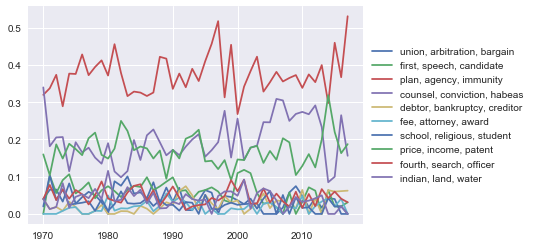

In [8]:
# ------------------------------------------------------------------------------
# YOUR CODE HERE
#
sorted_unique_years = np.sort(np.unique(years))
raw_counts = np.zeros((10, len(sorted_unique_years)))
for year_idx, year in enumerate(sorted_unique_years):
    for topic_idx in range(10):
        raw_counts[topic_idx, year_idx] = ((cluster_assignments == topic_idx) * (years == year)).sum()
total_counts_per_year = raw_counts.sum(axis=0)
for topic_idx in range(10):
    plt.plot(sorted_unique_years, raw_counts[topic_idx] / total_counts_per_year,
             label=', '.join(top_words_lsa[topic_idx][:3]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#
# END OF YOUR CODE
# -----------------------------------------------------------------------------